# Data Description


1.   User ID
2.   Instagram visit score
3.   Spending_rank(0 to 100)

# Importing required packages

In [40]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset and viewing the first 5 rows

In [41]:
df = pd.read_csv('/content/sample_data/Instagram visits clustering.csv')
df.head(5)

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [42]:
df.shape

(2600, 3)

# Converting required categorical features to numerical form

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  2600 non-null   int64  
 1   Instagram visit score    2600 non-null   int64  
 2   Spending_rank(0 to 100)  2600 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 61.1 KB


- We can see that, there are no categorical features in our Dataset.
- So, third step is not required for this dataset.

# Removing null values if required

In [44]:
df.isnull().sum()

User ID                    0
Instagram visit score      0
Spending_rank(0 to 100)    0
dtype: int64

**There is no null value**

## Lets see our dataset points in a `seaborn relation plot`

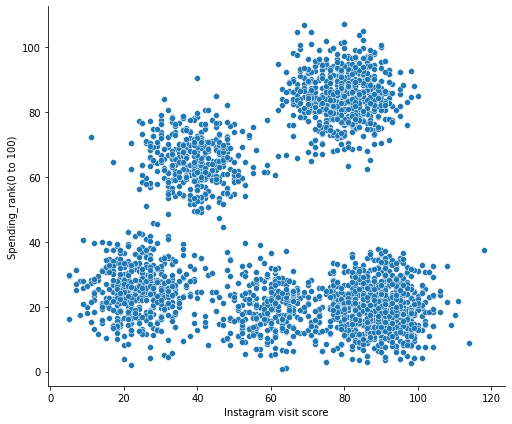

In [45]:
sns.relplot(x='Instagram visit score',
            y='Spending_rank(0 to 100)',
            data=df,
            palette='ch:r=-0.5, l=0.75',
            height=6,
            aspect=1.2)

# Scaling

In [46]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()
df_norm = sc.fit_transform(df)

# Building the K-Means model

In [48]:
numOfK = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in numOfK]

In [49]:
score = [kmeans[i].fit(df_norm).score(df_norm) for i in range(len(kmeans))]

# Selecting the ideal value of K for the dataset [elbow method]

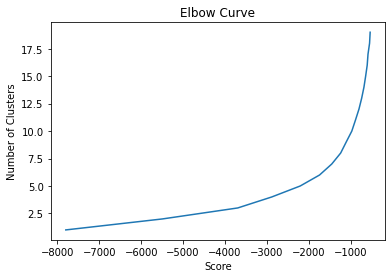

In [50]:
plt.plot(score, numOfK)
plt.xlabel('Score')
plt.ylabel('Number of Clusters')
plt.title('Elbow Curve')
plt.show()

**From the Elbow Curve we can see that, `K=4` will be better for this dataset**

In [51]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_norm)

KMeans(n_clusters=4)

In [52]:
kmeans.labels_,len(kmeans.labels_)

(array([1, 1, 3, ..., 2, 3, 0], dtype=int32), 2600)

In [53]:
df['clusters'] = kmeans.labels_

In [54]:
df.head(5)

,User ID,Instagram visit score,Spending_rank(0 to 100),clusters
0,0,63,24.050708,1
1,1,61,25.223290,1
2,2,104,18.528245,3
3,3,82,86.890232,2
4,4,14,31.492397,1


# Finding-out which data points are assigned to which clusters

In [55]:
df_clusters = df.groupby(['clusters']).count()

In [56]:
df_clusters

,User ID,Instagram visit score,Spending_rank(0 to 100)
clusters,,,
0,546,546,546
1,526,526,526
2,621,621,621
3,907,907,907


# Ploting the clusters

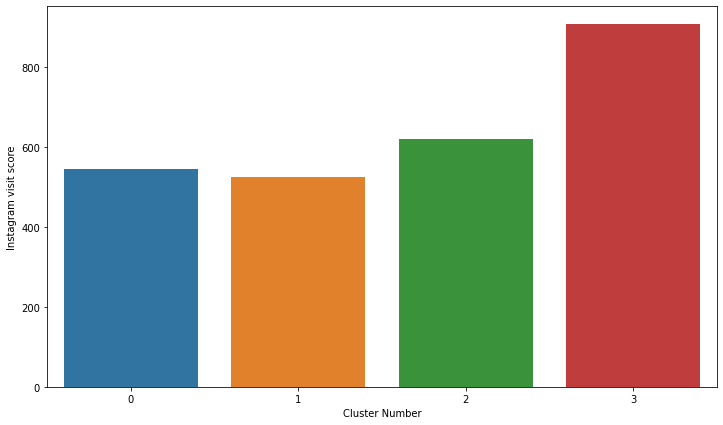

In [57]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,4,1),y=df.groupby(['clusters']).count()['Instagram visit score'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Instagram visit score")